<a href="https://colab.research.google.com/github/profshai/data-analysis/blob/main/cpi_wages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data comes from the US Bureau of Labor Statistics.

- CPI (CUUR0000SA0) represents CPI for all Urban Consumers 
- Wages (CIU2020000000000A) represents the wages and salaries of private industry workers in all industries and occupations.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bls

### Importing data using the API

In [5]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('bls_cpi_data.csv')
cpi_data = pd.read_csv('bls_cpi_data.csv')

In [6]:
cpi_data

,date,CUUR0000SA0
0,2012-01,226.665
1,2012-02,227.663
2,2012-03,229.392
3,2012-04,230.085
4,2012-05,229.815
...,...,...
108,2021-01,261.582
109,2021-02,263.014
110,2021-03,264.877
111,2021-04,267.054


In [8]:
cpi_data.columns = 'Date', 'CPI'
cpi_data

,Date,CPI
0,2012-01,226.665
1,2012-02,227.663
2,2012-03,229.392
3,2012-04,230.085
4,2012-05,229.815
...,...,...
108,2021-01,261.582
109,2021-02,263.014
110,2021-03,264.877
111,2021-04,267.054


In [10]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_wages_data_csv')
df = pd.read_csv('bls_wages_data_csv')
df.columns = 'Date', 'Wages'
df.head()

,Date,Wages
0,2012Q1,1.9
1,2012Q2,1.8
2,2012Q3,1.8
3,2012Q4,1.7
4,2013Q1,1.7


### Working with data

We want to sync between the two dataset so that the Dates are compatible.

In [12]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data['Date']

0      2012-01
1      2012-02
2       2012Q1
3      2012-04
4      2012-05
        ...   
108    2021-01
109    2021-02
110     2021Q1
111    2021-04
112    2021-05
Name: Date, Length: 113, dtype: object

We have to drop all Dates with a '-' so we can have only quarterly dataset.

In [14]:
newcpi = cpi_data[(cpi_data.Date.str.contains('-') == False)]
newcpi.to_csv('cpi-clean.csv')

In [16]:
newcpi.head()

,Date,CPI
2,2012Q1,229.392
5,2012Q2,229.478
8,2012Q3,231.407
11,2012Q4,229.601
14,2013Q1,232.773


In [17]:
newdf = df
newdf.head()

,Date,Wages
0,2012Q1,1.9
1,2012Q2,1.8
2,2012Q3,1.8
3,2012Q4,1.7
4,2013Q1,1.7


We want to convert the wage change percentages to match the cpi using the following function. 

In [18]:
# newnum is the starting 2002 first quarter cpi value.
newnum = 177.1
def process_wages(x):
  global newnum
  if type(x) is str:
    return x
  elif x:
    newnum = (x /400)* newnum + newnum
    return newnum
  else:
    return
newwages = newdf.applymap(process_wages)

In [19]:
newwages

,Date,Wages
0,2012Q1,177.941225
1,2012Q2,178.741961
2,2012Q3,179.546299
3,2012Q4,180.309371
4,2013Q1,181.075686
5,2013Q2,181.935795
6,2013Q3,182.754507
7,2013Q4,183.713968
8,2014Q1,184.494752
9,2014Q2,185.371102


### Merging and plotting data

In [21]:
# Date column should be the index
merged_data = pd.merge(newcpi, newwages, on='Date')
merged_data

,Date,CPI,Wages
0,2012Q1,229.392,177.941225
1,2012Q2,229.478,178.741961
2,2012Q3,231.407,179.546299
3,2012Q4,229.601,180.309371
4,2013Q1,232.773,181.075686
5,2013Q2,233.504,181.935795
6,2013Q3,234.149,182.754507
7,2013Q4,233.049,183.713968
8,2014Q1,236.293,184.494752
9,2014Q2,238.343,185.371102


Text(0.5, 0, 'Dates')

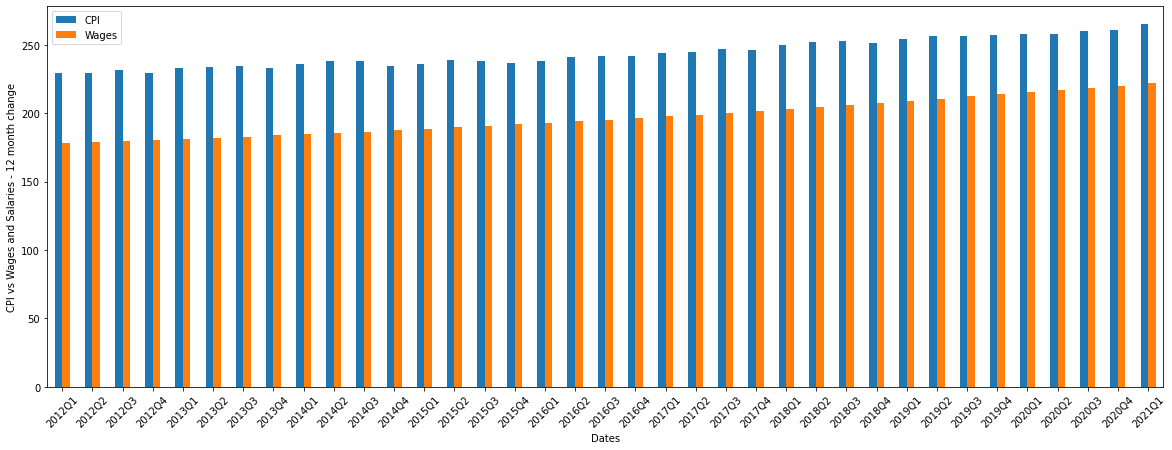

In [22]:
ax = merged_data.plot(kind='bar', figsize=(20,7))
# Set Date on the x-axis and rotate the labels by 45 degrees to make them more readable
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs Wages and Salaries - 12 month change')
ax.set_xlabel('Dates')

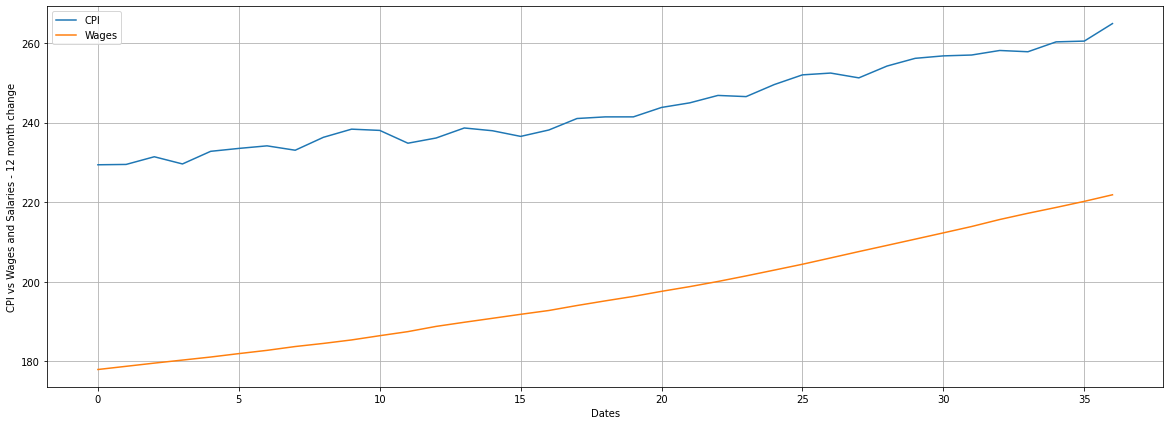

In [23]:
ax = merged_data.plot(kind='line', figsize=(20,7))
ax.set_ylabel('CPI vs Wages and Salaries - 12 month change')
ax.set_xlabel('Dates')
ax.grid()

### Incorporate S & P 500 

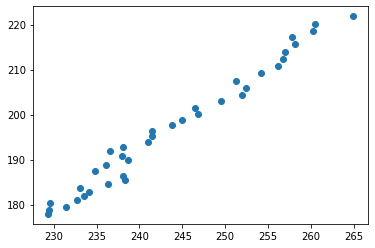

In [24]:
X = merged_data.CPI
y = merged_data.Wages
plt.scatter(X, y)